# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [1141]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [1142]:
rides = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [1143]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [1144]:
rides.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

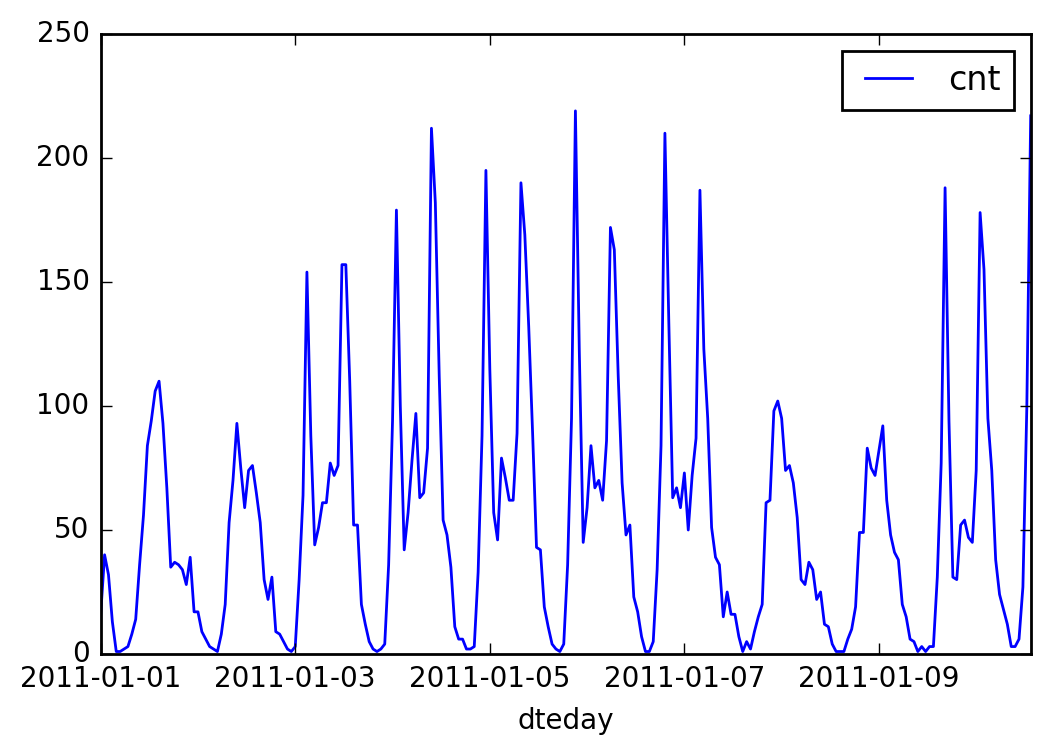

In [1145]:
rides[:24*10].plot(x='dteday', y='cnt')

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [1146]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [1147]:
data.columns

Index([u'yr', u'holiday', u'temp', u'hum', u'windspeed', u'casual',
       u'registered', u'cnt', u'season_1', u'season_2', u'season_3',
       u'season_4', u'weathersit_1', u'weathersit_2', u'weathersit_3',
       u'weathersit_4', u'mnth_1', u'mnth_2', u'mnth_3', u'mnth_4', u'mnth_5',
       u'mnth_6', u'mnth_7', u'mnth_8', u'mnth_9', u'mnth_10', u'mnth_11',
       u'mnth_12', u'hr_0', u'hr_1', u'hr_2', u'hr_3', u'hr_4', u'hr_5',
       u'hr_6', u'hr_7', u'hr_8', u'hr_9', u'hr_10', u'hr_11', u'hr_12',
       u'hr_13', u'hr_14', u'hr_15', u'hr_16', u'hr_17', u'hr_18', u'hr_19',
       u'hr_20', u'hr_21', u'hr_22', u'hr_23', u'weekday_0', u'weekday_1',
       u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5', u'weekday_6'],
      dtype='object')

### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [1148]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    print("each_feature:",each,"mean:",mean,"std:",std)
    scaled_features[each] = [mean, std]  #dictionary
    data.loc[:, each] = (data[each] - mean)/std  #all  row for  each  feature: standardize
#     print("*",data.loc[:, each])

('each_feature:', 'casual', 'mean:', 35.676218424535357, 'std:', 49.30503038705308)
('each_feature:', 'registered', 'mean:', 153.78686920996606, 'std:', 151.35728591258314)
('each_feature:', 'cnt', 'mean:', 189.46308763450142, 'std:', 181.38759909186473)
('each_feature:', 'temp', 'mean:', 0.4969871684216583, 'std:', 0.19255612124972191)
('each_feature:', 'hum', 'mean:', 0.6272288394038783, 'std:', 0.19292983406291508)
('each_feature:', 'windspeed', 'mean:', 0.1900976063064618, 'std:', 0.12234022857279049)


In [1149]:
#my
print(mean, std)

(0.1900976063064618, 0.12234022857279049)


In [1150]:
#my
print(type(scaled_features), scaled_features)

(<type 'dict'>, {'cnt': [189.46308763450142, 181.38759909186473], 'temp': [0.4969871684216583, 0.19255612124972191], 'hum': [0.6272288394038783, 0.19292983406291508], 'registered': [153.78686920996606, 151.35728591258314], 'windspeed': [0.1900976063064618, 0.12234022857279049], 'casual': [35.676218424535357, 49.30503038705308]})


### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a validation set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [1151]:
# #my test just 0.2day
# # Save the last 21 days 
# validation = data[-0.2*24:]
# data = data[:-0.2*24]
# #my
# print(validation.head(3),validation.size)
# print("#"*33)
# print(data.head(3),data.size)

# # Separate the data into features and targets
# target_fields = ['cnt', 'casual', 'registered']
# features, targets = data.drop(target_fields, axis=1), data[target_fields]
# val_features, val_targets = validation.drop(target_fields, axis=1), validation[target_fields]

In [1152]:
# Save the last 21 days 2012, 12. sund(9,16,23,30)
validation = data[-21*24:]
data = data[:-21*24]
#my
print(validation.head(3),validation.size)
print("#"*33)
print(data.head(3),data.size)

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
val_features, val_targets = validation.drop(target_fields, axis=1), validation[target_fields]

(       yr  holiday      temp       hum  windspeed    casual  registered  \
16875   1        0  0.015647  0.999178   0.276298 -0.500481   -0.256260   
16876   1        0 -0.192085  1.310171   0.519881 -0.561326   -0.513929   
16877   1        0 -0.192085  0.740016   2.228232 -0.683018   -0.824452   

            cnt  season_1  season_2    ...      hr_21  hr_22  hr_23  \
16875 -0.349876         0         0    ...          0      1      0   
16876 -0.581424         0         0    ...          0      0      1   
16877 -0.873616         0         0    ...          0      0      0   

       weekday_0  weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
16875          0          1          0          0          0          0   
16876          0          1          0          0          0          0   
16877          0          0          1          0          0          0   

       weekday_6  
16875          0  
16876          0  
16877          0  

[3 rows x 59 columns], 29736)
#####

We'll split the data into two sets, one for training and one for testing as the network is being trained. It's important to split the data randomly so all cases are represented in both sets.

In [1153]:
#my
print(features.shape,features.index)
features.head(3)

((16875, 56), RangeIndex(start=0, stop=16875, step=1))


,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,-1.334609,0.947345,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.438475,0.895513,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [1154]:
n_records = features.shape[0]  #number of  row
print("features.shape[0]:",n_records)
split = np.random.choice(features.index, 
                         size=int(n_records*0.8), 
                         replace=False)
train_features, train_targets = features.ix[split], targets.ix[split]
test_features, test_targets = features.drop(split), targets.drop(split)

('features.shape[0]:', 16875)


In [1155]:
print(test_features.shape)
test_features.head(3)

(3375, 56)


,yr,holiday,temp,hum,windspeed,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
9,0,0,-0.919146,0.688184,-1.553844,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
31,0,0,-0.503683,0.429022,0.276298,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38,0,0,-0.815280,0.947345,-0.211685,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [1156]:
print(test_targets.shape)
test_targets.head(3)

(3375, 3)


,cnt,casual,registered
9,-0.967338,-0.561326,-0.976411
31,-1.000416,-0.723582,-0.963197
38,-0.636554,-0.338225,-0.652673


## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. . You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is  f(x)=xf(x)=x . A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called Forward Propagation.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called Backpropagation.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

In [1157]:
# #my
# epochs = 10000
# learning_rate = 0.001
# hidden_nodes = 200
# output_nodes = 1

# N_i = train_features.shape[1] #56
# print("train_features.shape[1]:",N_i)
# # # network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)
# # # class NeuralNetwork:
# # #    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
# # #         # Set number of nodes in input, hidden and output layers.
# # #         self.input_nodes = input_nodes
# # #         self.hidden_nodes = hidden_nodes
# # #         self.output_nodes = output_nodes
# print ("self.weights_input_to_hidden:\n")
# print (np.random.normal(0.0, hidden_nodes**-0.5, 
#                                        (hidden_nodes, N_i)))  
# print ("*",np.random.normal(0.0, hidden_nodes**-0.5, 
#                                        (hidden_nodes, N_i)).shape)   
# print ("self.weights_hidden_to_output:\n")
# print (np.random.normal(0.0, output_nodes**-0.5, 
#                                        (output_nodes, hidden_nodes)))
# print ("**",np.random.normal(0.0, output_nodes**-0.5, 
#                                        (output_nodes, hidden_nodes)).shape)
# # x = np.array([[0,0,1],
# #               [0,1,1],
# #               [1,0,1],
# #               [1,1,1]])
# # def actf(x):
# #     activation_function = lambda x: 1/(1+np.exp(-x))

# # print (actf(x))

In [1158]:
#sigmoid  function  test
hidden_inupt1=np.array(
      [[ 1.16888254],
       [ 1.09198465],
       [-0.84237632],
       [-0.68582608],
       [-0.12797966]])
hidden_output1=np.array(
       [[ 0.76294297],
       [ 0.74875526],
       [ 0.30103454],
       [ 0.33496222],
       [ 0.46804868]]) 
print(1/(1+np.exp(-hidden_inupt1)))


[[ 0.76294297]
 [ 0.74875526]
 [ 0.30103454]
 [ 0.33496222]
 [ 0.46804868]]


In [1159]:
t2 = np.arange(200).reshape(200,1)
# aa1=t2*(1-t2)
# print(aa1,aa1.shape)
print((t2*t2).shape)

(200, 1)


In [1160]:
ttt3=np.arange(13500*56).reshape(13500,56)
ttt4=np.array(ttt3, ndmin=2).T
print(ttt4.shape)

(56, 13500)


In [1161]:
class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights 
        #(200, 56)   #number of hidden node : 200
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))
        #(1, 200)
        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = lambda x: 1/(1+np.exp(-x))
    
    def train(self, inputs_list, targets_list):  #((128,56) , (128,))
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T  #(56.1)
#         print("inputs:",inputs.shape)
        targets = np.array(targets_list, ndmin = 2).T  #(1,1)
#         print("targets:",targets.shape)
        #### Implement the forward pass here ####
        ### Forward pass ###
        # Hidden layer
        #(200, 56) dot (56,1) makes  (200,1)
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
#         print("hidden_inputs:",hidden_inputs)
## sigmoid OK
        #  hidden_outputs(200,1)      <- hidden_inputs  (200,1)
        hidden_outputs = self.activation_function(hidden_inputs)
#         print("hidden_outputs:",hidden_outputs)
        # Output layer
        #          (1,1)    <-      (1,200) dot (200,1)     
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        
# error :  need  to  change ! to below
#         final_outputs = self.activation_function(final_inputs)  #(1,1)
        final_outputs = final_inputs  #(1,1)
        ### Backward pass ###
        # Output error(1,1) <- (1,1)-(1,1)
        output_errors = targets - final_outputs
        
        # Backpropagated error
        #  hidden_errors   (200,1)       <-  (200,1) dot (1,1)
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)
# # error : maybe !!        
# #        (200,1)   <-        (200,1)*(1.0 -(200,1))          
#         hidden_grad = hidden_outputs * (1.0 - hidden_outputs)
        # (200,1)   <-       (1,1)*(200,1)          
        hidden_grad = output_errors * 1 *hidden_outputs 
        # Update the weights
        #    (1,200)             <-                   (1,1) dot (1,200)
        self.weights_hidden_to_output += self.lr * np.dot(output_errors, 
                                                          hidden_outputs.T)
        #                                         (200,1)*(200,1) is(200,1),so (200,1)
        #                                 so  (200,1) dot ()
        self.weights_input_to_hidden += self.lr * np.dot(hidden_errors * hidden_grad, inputs.T)
    # actual run() variable  is  train_features, (13500, 56)
    def run(self, inputs_list): 
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T #(56,1)
        
        #### Implement the forward pass here ####
        # Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)

#This is our prediction step. Basically, we first let the network "try" to predict the output given the input.         
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [1162]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [1163]:
# import matplotlib.pylab as plt
# fig, ax = plt.subplots()
# fit = np.polyfit(final_inputs, final_outputs, deg = 1)
# ax.plot(final_inputs,final_outputs, color = 'red')
# ax.scatter(final_inputs,final_outputs)

## Training the network

Here you'll set the hyperparameters for the network. You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network much faster. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. However, it can become too specific to the training set and will fail to generalize to the test set. This is called overfitting. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance.

In [1164]:
# #my
# print(train_features.index, train_features.shape)
# #randomly selcect 5 index number of  features
# batch=np.random.choice(train_features.index, size=5)  
# # print("batch:",batch)
# # print("##train_features.iloc[2255]: ")
# # print(train_features.iloc[2255])
# # print("*"*55)
# #  (5, 56)
# print(train_features.ix[batch].values,train_features.ix[batch].values.shape) 
# print("$$",train_features.ix[batch].values[0].shape) #(56,)
# print("*"*55)
# #(5,)
# print(train_targets.ix[batch]['cnt'],train_targets.ix[batch]['cnt'].shape)

In [1165]:
# aaa1=np.arange(128*56).reshape(128,56)
# aaa2=np.arange(128).reshape(128,)
# print(aaa1.shape)
# print(aaa2.shape)
# print("zip(aaa1,aaa2).shape",len(zip(aaa1,aaa2))) #('zip(aaa1,aaa2).shape', 128)
# # print("zip(aaa1,aaa2)",zip(aaa1,aaa2))  #[((128,56),(128,)),((128,56),(128,)),...]
# for i2, j2 in zip(aaa1,aaa2):
#     # Convert inputs list to 2d array
#         inputs2 = np.array(i2, ndmin=2).T  #(56.1)
# #         print("i2:",i2,"inputs:",inputs2.shape)
#         targets2 = np.array(j2, ndmin = 2).T  #(1,1)
# #         print("j2:",j2,"targets:",targets2.shape)

('zip(aaa1,aaa2)', [(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55]), 0), (array([ 56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111]), 1), (array([112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167]), 2),...]

In [1166]:
### Set the hyperparameters here ###
epochs = 10000
# epochs =20000
# epochs =5000
# learning_rate = 0.001
learning_rate = 0.01
hidden_nodes = 200
#hidden_nodes = 80
# hidden_nodes = 40
output_nodes = 1

N_i = train_features.shape[1]  #56 -> input_features
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'test':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    ## train_features.shape -> (13500, 56)
    ##ex)batch - array([14022, 13649,  6771,  3987, 11990...],number ofindex is 128
    batch = np.random.choice(train_features.index, size=128)
    #                    zip( (128,56),(128,))
    for record, target in zip(train_features.ix[batch].values, train_targets.ix[batch]['cnt']):
        network.train(record, target)  #train function used here !
    
    if e%(epochs/10) == 0:
        # Calculate losses for the training and test sets
        # train_features.shape (13500, 56)
        train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
        test_loss = MSE(network.run(test_features), test_targets['cnt'].values)
        losses['train'].append(train_loss)
        losses['test'].append(test_loss)
        
        # Print out the losses as the network is training
        print('Training loss: {:.4f}'.format(train_loss))
        print('Test loss: {:.4f}'.format(test_loss))
        pass
        

/home/ys/.local/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: overflow encountered in exp


Training loss: 1.1832
Test loss: 1.1484
Training loss: 1.5625
Test loss: 1.5224
Training loss: 1.1272
Test loss: 1.0946
Training loss: 1.1616
Test loss: 1.1356
Training loss: 1.1622
Test loss: 1.1353
Training loss: 1.1601
Test loss: 1.1365
Training loss: 1.3153
Test loss: 1.2780
Training loss: 1.1085
Test loss: 1.0777
Training loss: 1.1062
Test loss: 1.0757
Training loss: 1.1374
Test loss: 1.1099


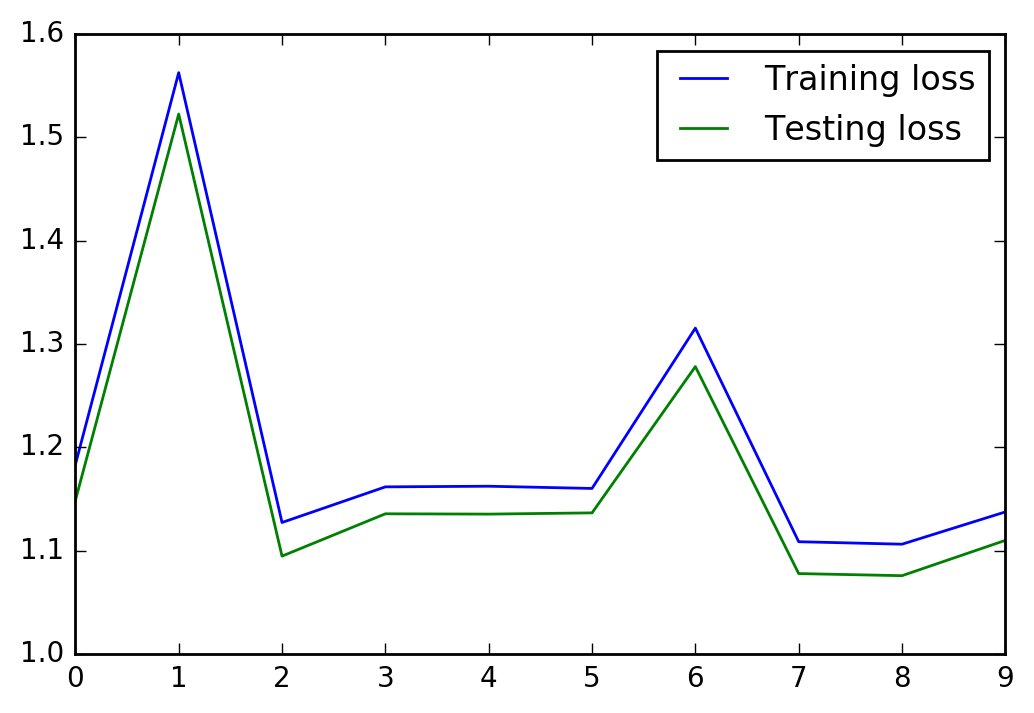

In [1167]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['test'], label='Testing loss')
plt.legend()

## Check out your predictions

Here, use the validation data to check that network is accurately making predictions. If your predictions don't match the data, try adjusting the hyperparameters and check to make sure the forward passes in the network are correct.

In [1168]:
scaled_features['cnt'][:3]

[189.46308763450142, 181.38759909186473]

((1, 504), (504,))
[ 300.0569535   299.66612778  276.63633361  299.66516604  299.65101925
  292.57120014  299.66867183]
[ 126.   84.   31.    8.    1.    3.    8.]
******************************
[ 300.0569535   299.66612778  276.63633361  299.66516604  299.65101925
  292.57120014  299.66867183]
[ 126.   84.   31.    8.    1.    3.    8.]


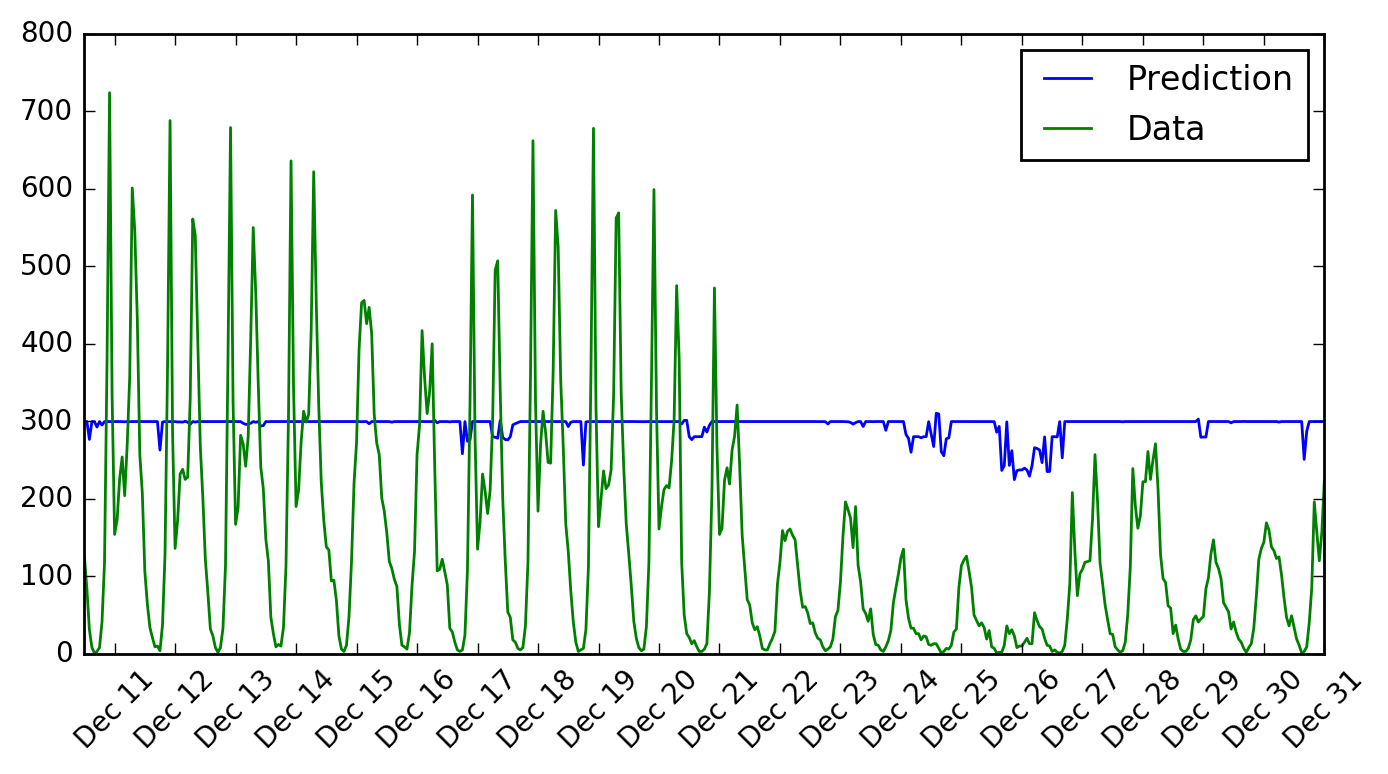

In [1169]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']   #dictionary - key:feature name, value: [mean, std]
predictions = network.run(val_features)*std + mean  #(1,504)
print(predictions.shape, predictions[0].shape)
print (predictions[0][:7])
print((val_targets['cnt'][:7]*std + mean).values)
print("*"*30)
print (predictions[0][:7])
print((val_targets['cnt'][:7]*std + mean).values)
ax.plot(predictions[0], label='Prediction')
ax.plot((val_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(rides.ix[validation.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

# Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below
The model seems to get stuck between two levels. Not really sure whats going on here. I tried adding hidden units to improve the predictions, but it didn't work.